## Importacion de librerias

In [32]:
post.transaction("""CREATE TABLE IF NOT EXISTS node_data(
	                 id serial Primary Key,
	                 sampletime TIME
	                    )""")
                    
post.transaction("""CREATE TABLE IF NOT EXISTS temperature (
                     id serial Primary Key,
	                 node_data_id INTEGER NOT NULL,
	                 temperature DECIMAL(5,2),
	                 alarm BOOL,
	                 CONSTRAINT fk_node_data
	                 FOREIGN KEY (node_data_id)
	                 REFERENCES node_data (id)
	                 ON DELETE CASCADE
            	     ON UPDATE CASCADE
                    )""")
        
post.transaction("""CREATE TABLE IF NOT EXISTS humidity (
                     id serial Primary Key,
	                 node_data_id INTEGER NOT NULL,
	                 humidity DECIMAL(5,2),
	                 alarm BOOL,
	                 CONSTRAINT fk_node_data
	                 FOREIGN KEY (node_data_id)
	                 REFERENCES node_data (id)
	                 ON DELETE CASCADE
            	     ON UPDATE CASCADE
                    )""")

'escritura completa'

In [9]:

from database.connection import * 
from service import Service
from entities.node import * 
from other.extract_data import *
import serial

servicio = Service(post)
servicio.getAll()

/home/max008800/proyects/python/iot-2024s1/practico-2/src/database/connection.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  read = pd.read_sql_query(query ,self.conn)


,id,sampletime
0,1,15:42:59.830998
1,2,15:43:50.737454
2,3,15:44:46.855783
3,4,15:45:38.985603
4,5,15:46:29.106651
5,6,15:47:23.223230
6,7,15:48:15.369416
7,8,15:49:07.472329
8,9,15:49:55.570555
9,10,15:50:51.709331


In [11]:
datos = servicio.getOneById(8)
datos

/home/max008800/proyects/python/iot-2024s1/practico-2/src/database/connection.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  read = pd.read_sql_query(query ,self.conn)


,id,sampletime,id,node_data_id,temperature,alarm,id,node_data_id,humidity,alarm
0,8,15:49:07.472329,40,8,4.0,False,53,8,127.0,True
1,8,15:49:07.472329,41,8,65.0,True,53,8,127.0,True
2,8,15:49:07.472329,42,8,24.0,True,53,8,127.0,True
3,8,15:49:07.472329,43,8,185.0,True,53,8,127.0,True
4,8,15:49:07.472329,44,8,243.0,True,53,8,127.0,True
5,8,15:49:07.472329,45,8,24.0,True,53,8,127.0,True
6,8,15:49:07.472329,46,8,97.0,True,53,8,127.0,True
7,8,15:49:07.472329,47,8,131.0,True,53,8,127.0,True
8,8,15:49:07.472329,48,8,109.0,True,53,8,127.0,True
9,8,15:49:07.472329,40,8,4.0,False,54,8,234.0,True


<function matplotlib.pyplot.show(close=None, block=None)>

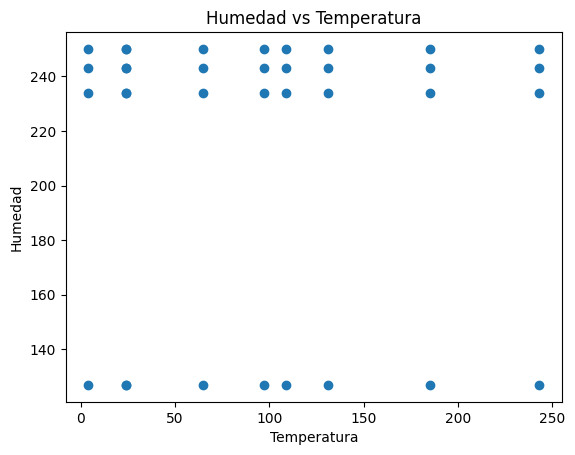

In [12]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.scatter(datos['temperature'],datos['humidity'])
plt.xlabel('Temperatura')
plt.ylabel('Humedad')
plt.title('Humedad vs Temperatura')
plt.show

In [13]:
datos1 = servicio.getAllTemperatures()
datos2 = datos1.head(70)
datos2

/home/max008800/proyects/python/iot-2024s1/practico-2/src/database/connection.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  read = pd.read_sql_query(query ,self.conn)


,id,sampletime,id,node_data_id,temperature,alarm
0,1,15:42:59.830998,1,1,216.0,True
1,1,15:42:59.830998,2,1,12.0,False
2,1,15:42:59.830998,3,1,246.0,True
3,1,15:42:59.830998,4,1,207.0,True
4,2,15:43:50.737454,5,2,217.0,True
5,2,15:43:50.737454,6,2,223.0,True
6,2,15:43:50.737454,7,2,255.0,True
7,2,15:43:50.737454,8,2,31.0,True
8,2,15:43:50.737454,9,2,122.0,True
9,2,15:43:50.737454,10,2,153.0,True


<Axes: title={'center': 'Temperatura'}, xlabel='sampletime', ylabel='count'>

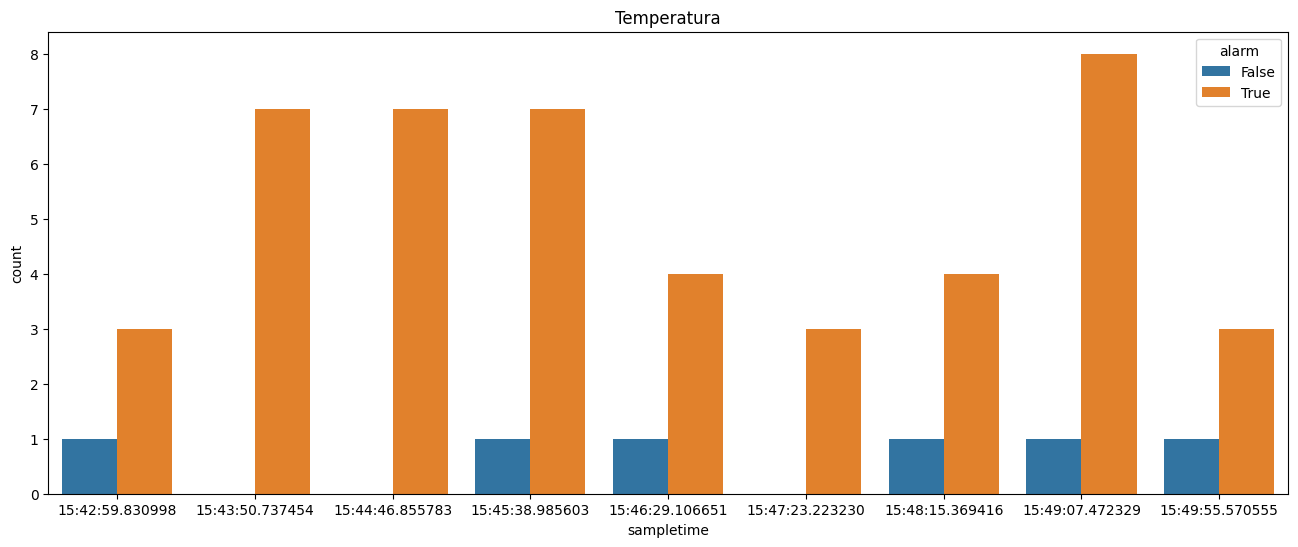

In [14]:
plt.figure(figsize=(16,6))
plt.title('Temperatura')
sb.countplot(x="sampletime", data=datos2, hue="alarm")

In [15]:
datos3 = servicio.getAllHumidity()
datos4 = datos3.head(70)
datos4

/home/max008800/proyects/python/iot-2024s1/practico-2/src/database/connection.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  read = pd.read_sql_query(query ,self.conn)


,id,sampletime,id,node_data_id,humidity,alarm
0,1,15:42:59.830998,1,1,209.0,True
1,1,15:42:59.830998,2,1,13.0,False
2,1,15:42:59.830998,3,1,67.0,True
3,1,15:42:59.830998,4,1,72.0,True
4,1,15:42:59.830998,5,1,63.0,True
...,...,...,...,...,...,...
60,9,15:49:55.570555,61,9,142.0,True
61,9,15:49:55.570555,62,9,248.0,True
62,9,15:49:55.570555,63,9,31.0,True
63,9,15:49:55.570555,64,9,15.0,False


Text(0.5, 1.0, 'Humedad')

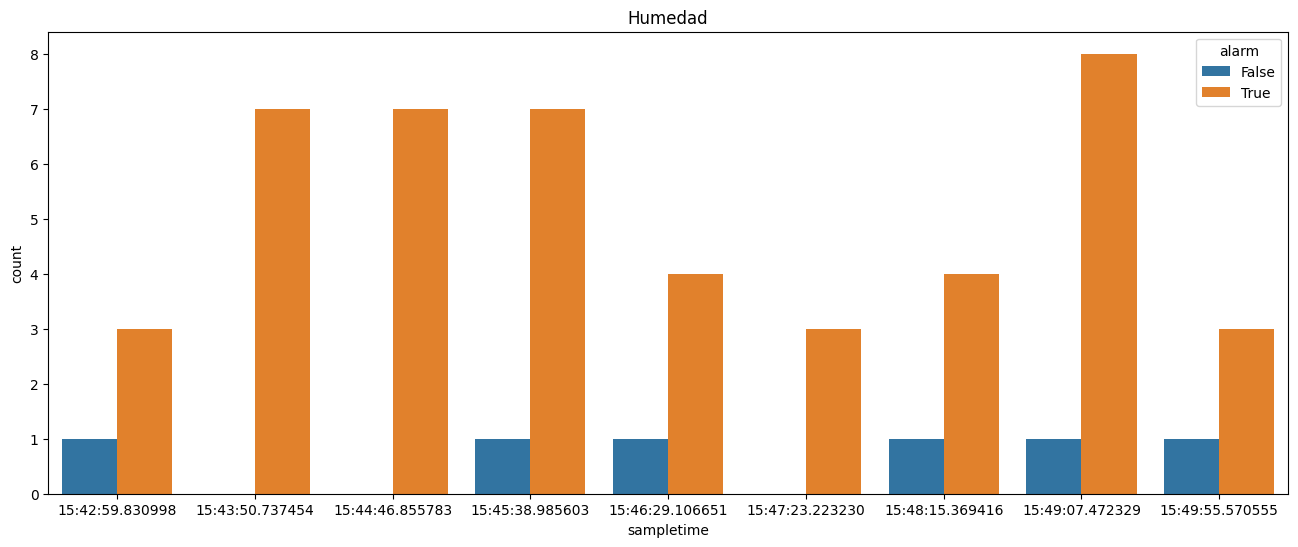

In [16]:

plt.figure(figsize=(16,6))
sb.countplot(x="sampletime", data=datos2, hue="alarm")
plt.title('Humedad')